# KNeighborsClassifier 

## Importamos las librerias

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix 		#Usar para comprobar resultados
from sklearn.metrics import classification_report 	#Usar para comprobar resultados



## Cargamos los datos en el notebook

In [123]:
direction_train = "../Train_knight.csv"
direction_xtest = "../Test_knight.csv"

x = pd.read_csv(direction_train)
x["knight"] = x["knight"].map({"Jedi": 1, "Sith": 0})
y = x["knight"]
x = x.drop("knight", axis=1)

## Transformamos los datos (Standarizacion)

In [124]:
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

# Convertimos de nuevo a DataFrame para que sea legible
x_normalized = pd.DataFrame(x_normalized, columns=x.columns)

## Separamos los datos en testing y training

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y,test_size=0.2, random_state=42)

## Reutilizamos el codigo del calculo de las matrices de confusion

In [126]:
def calculate_matrix(y, y_predict):
    matrix = [[0, 0], [0, 0]]  # [[TP, FP], [FN, TN]]
    
    for index in range(len(y)):
        true_val = y.iloc[index]
        pred_val = y_predict[index]

        if true_val == 1 and pred_val == 1:  # True Positive
            matrix[0][0] += 1
        elif true_val == 0 and pred_val == 1:  # False Positive
            matrix[0][1] += 1
        elif true_val == 1 and pred_val == 0:  # False Negative
            matrix[1][0] += 1
        elif true_val == 0 and pred_val == 0:  # True Negative
            matrix[1][1] += 1

    return matrix

def calculate_metrics(matrix):
    #Base metrics
    TP = matrix[0][0]
    FN = matrix[0][1]
    FP = matrix[1][0]
    TN = matrix[1][1]

    #Metrics for jedi
    precision_j = TP / (TP + FP) #precision para determinar un jedi
    recall_j = TP / (TP + FN) #sensibilidad para determinar un jedi
    f1_score_j = (2 * (precision_j * recall_j)) / (precision_j + recall_j)
    total_j = TP + FN #Total of jedis

    #Shit (i didnt meant sith) Metrics
    precision_s = TN / (TN + FN) #precision para determinar un sith
    recall_s = TN / (TN + FP) #sensibilidad para determinar un sith
    f1_score_s = (2 * (precision_s * recall_s)) / (precision_s + recall_s)
    total_s = TN + FP #Total of shits

	#accuracy over total predictions
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    total = TP + TN + FP + FN

    print(f"{'':<10}{'precision':>10}{'recall':>10}{'f1-score':>12}{'total':>8}")
    print(f"{'Jedi : 1':<10}{precision_j:>10.2f}{recall_j:>10.2f}{f1_score_j:>12.2f}{total_j:>8}")
    print(f"{'Sith : 0':<10}{precision_s:>10.2f}{recall_s:>10.2f}{f1_score_s:>12.2f}{total_s:>8}")
    print(f"{'accuracy':<30}{accuracy:>12.2f}{total:>8}")
    return
#       Confusion Table
#           Predicción
#           1     0
#Real  1 | TP | FN |
#      0 | FP | TN |
def plot_confusion_matrix(matrix):
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Jedi : 1', 'Sith : 0']); ax.yaxis.set_ticklabels(['Jedi : 1', 'Sith : 0'])
    plt.show()

## Creamos el objeto modelo y lo cargamos

In [127]:

k_range = range(1, 31)
#k_range
best_score = 0
best_k = 1
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k) #Aqui modificamos el numero de "vacinos" en los datos para aproximarnos
    score = cross_val_score(knn, x_train, y_train, cv= 6, scoring='accuracy')

    avg_score = score.mean()
    
    if avg_score > best_score:
        best_score = avg_score
        best_k = k
    scores.append([k,avg_score])

## Realizamos las predicciones

In [128]:
df = pd.DataFrame(scores, columns=['k', 'accuracy'])
df.head(10)

,k,accuracy
0,1,0.918239
1,2,0.933962
2,3,0.949686
3,4,0.955975
4,5,0.952830
5,6,0.952830
6,7,0.952830
7,8,0.946541
8,9,0.943396
9,10,0.937107


In [129]:
## Realizamos el plot para visualizar 

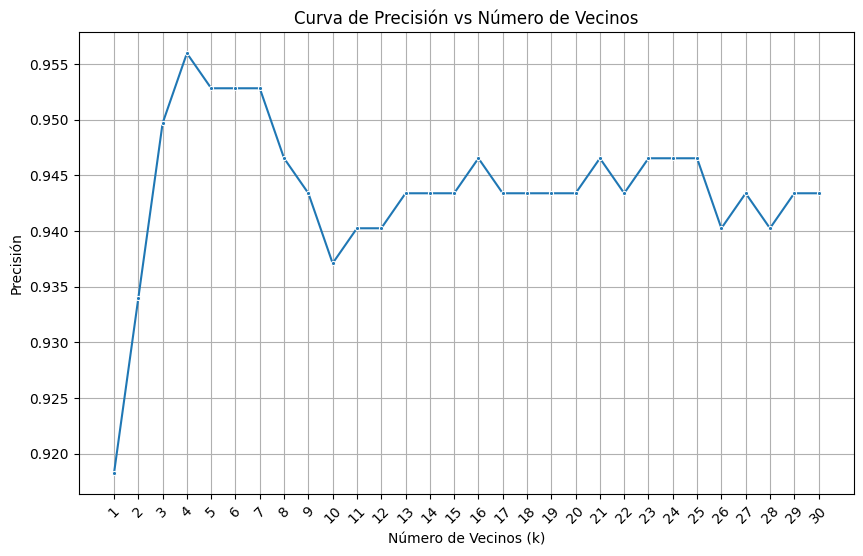

In [130]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="k", y="accuracy", marker= '.')
plt.xticks(rotation=45)
plt.xticks(df['k'], rotation=45)
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.title('Curva de Precisión vs Número de Vecinos')
plt.grid(True)
plt.show()